# Research topics in Data Mining

little introduction here

## Read and preprocess the data

In [1]:
import sys
sys.path.append("..")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from src.preprocess import read_data
from src.visualization import plot_feature_importance, plot_correlation_matrix, plot_distribution
from src.missing_data import *
import warnings
warnings.filterwarnings('ignore')

CSV_FILE = "../data/data.csv"

X, y = read_data(CSV_FILE)
X.head()
y.head()

Dropping 21 columns...
DataFrame shape: (569, 12)
Label distribution:
0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Implement missing data functions

### 5% Missing Values

In [2]:
DF_MAR_5 = get_missing_df(X, 0.05, "MAR")
DF_MNAR_5 = get_missing_df(X, 0.05, "MNAR")
DF_MCAR_5 = get_missing_df(X, 0.05, "MCAR")

DF_MAR_5

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,NaN,0.09791,0.1752,0.05533
566,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


### 10% Missing Values

In [3]:
DF_MAR_10 = get_missing_df(X, 0.10, "MAR")
DF_MNAR_10 = get_missing_df(X, 0.10, "MNAR")
DF_MCAR_10 = get_missing_df(X, 0.10, "MCAR")

DF_MNAR_10

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,NaN,0.2419,0.07871
1,NaN,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,NaN
3,11.420000,NaN,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,NaN,0.09744
4,20.290001,14.340000,135.100006,1297.000000,0.10030,NaN,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.129999,NaN,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.600000,28.080000,108.300003,858.099976,0.08455,NaN,0.09251,0.05302,0.1590,0.05648
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


### 30% Missing Values

In [4]:
DF_MAR_30 = get_missing_df(X, 0.30, "MAR")
DF_MNAR_30 = get_missing_df(X, 0.30, "MNAR")
DF_MCAR_30 = get_missing_df(X, 0.30, "MCAR")

DF_MCAR_30

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,NaN,0.30010,0.14710,NaN,0.07871
1,20.570000,17.770000,NaN,1326.000000,0.08474,0.07864,NaN,0.07017,0.1812,0.05667
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.420000,20.379999,NaN,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,NaN
4,20.290001,NaN,135.100006,NaN,NaN,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,NaN,0.1726,0.05623
565,20.129999,28.250000,131.199997,NaN,0.09780,0.10340,0.14400,0.09791,0.1752,NaN
566,NaN,28.080000,108.300003,NaN,0.08455,NaN,0.09251,NaN,0.1590,0.05648
567,NaN,29.330000,140.100006,1265.000000,0.11780,NaN,0.35140,0.15200,0.2397,NaN


## Metrics evaluation

In [5]:
X.mean()

radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smoothness             0.096360
compactness            0.104341
concavity              0.088799
concave points         0.048919
symmetry               0.181162
fractal_dimension      0.062798
dtype: float64

In [6]:
DF_MAR_5.mean()

radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smoothness             0.096360
compactness            0.104341
concavity              0.091134
concave points         0.048919
symmetry               0.181162
fractal_dimension      0.062798
dtype: float64

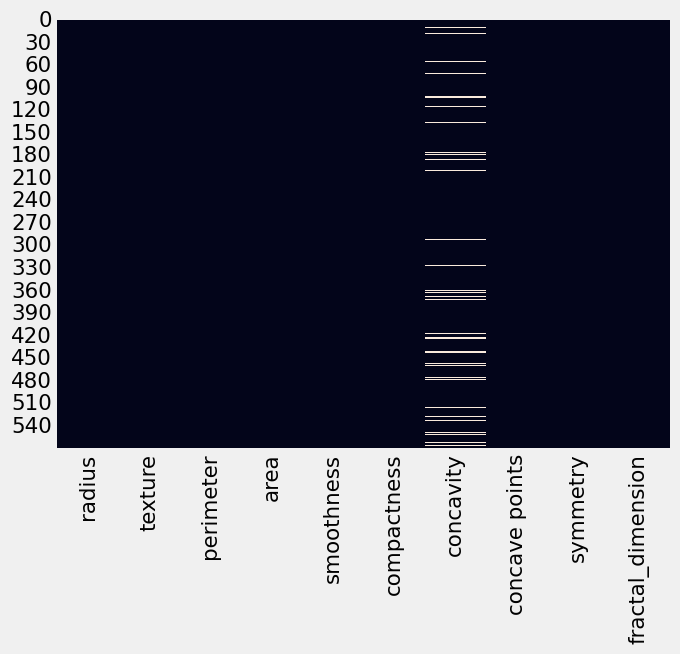

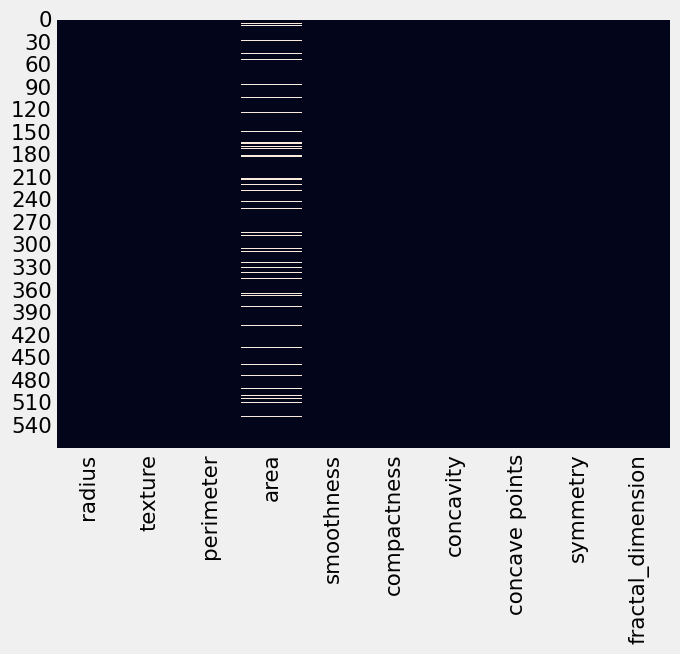

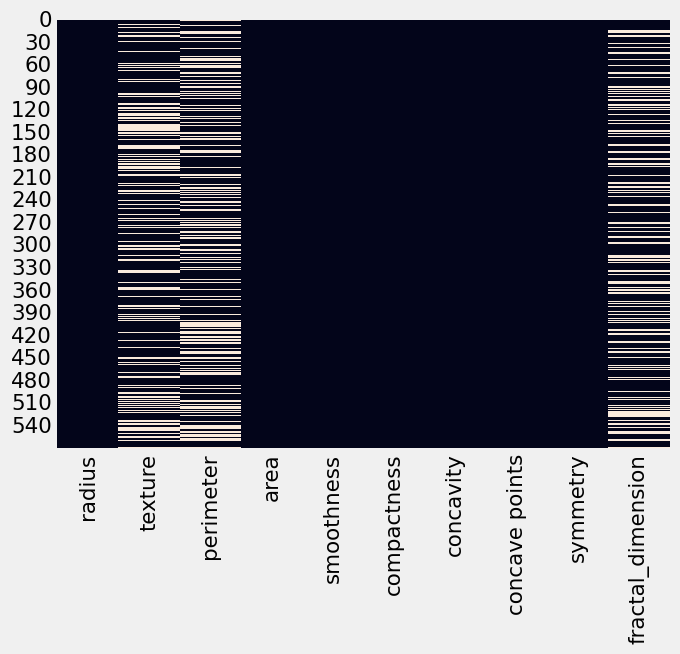

In [7]:
from src.visualization import plot_missing_data


plot_missing_data(DF_MAR_5)
plot_missing_data(DF_MAR_10)
plot_missing_data(DF_MAR_30)

In [8]:
apply_metrics(X, DF_MAR_5)

[(13.837116555072159, 14.417466931072537), (18.935495128467096, 19.6438019288875), (89.96822067261496, 93.96984592725272), (625.9119942670562, 683.8662133610297), (0.09520222100326187, 0.09751834158299455), (0.0999923067350324, 0.10868966186059723), (0.08448834916232174, 0.09778042178686018), (0.04572406456448159, 0.05211422738012698), (0.1789045321589664, 0.1834191939968795), (0.062216249416986315, 0.06337897004250966)]
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
Real Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798
Predicted Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.091134,0.048919,0.181162,0.062798
Bias,0.0,0.0,0.0,0.0,0.0,0.0,0.002335,0.0,0.0,0.0
Confidence Interval,"(13.837116555072159, 14.417466931072537)","(18.935495128467096, 19.6438019288875)","(89.96822067261496, 93.96984592725272)","(625.9119942670562, 683.8662133610297)","(0.09520222100326187, 0.09751834158299455)","(0.0999923067350324, 0.10868966186059723)","(0.08448834916232174, 0.09778042178686018)","(0.04572406456448159, 0.05211422738012698)","(0.1789045321589664, 0.1834191939968795)","(0.062216249416986315, 0.06337897004250966)"
Coverage Rate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ML model pipeline for classification

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.7)

# Amputation
Ampute X_train here. Let's leave the X_test set without any amputation so that we can compare how the amputation in the training set is affecting the predictions on a full test set. 

In [10]:
from src.model import train

rf = train(X_train, y_train)

In [11]:
pred = rf.predict(X_test)

## Evaluate somehow our results

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



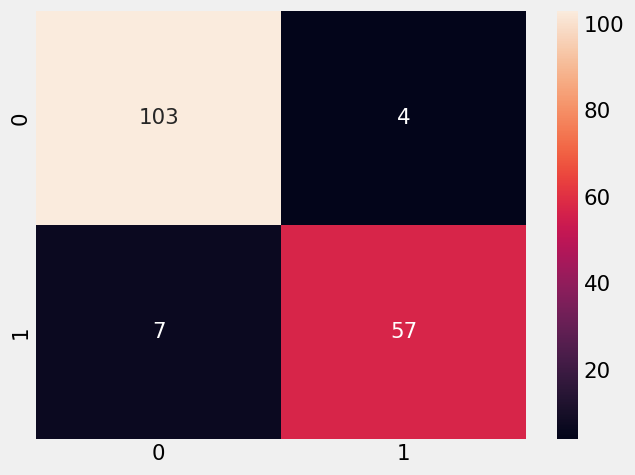

In [12]:
from sklearn.metrics import classification_report
from src.visualization import plot_confusion_matrix

print(classification_report(y_test, pred))
plot_confusion_matrix(y_test, pred, [0, 1])

In [13]:
import pandas as pd

feature_scores = pd.Series(rf["rf"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

concave points       0.310279
perimeter            0.161415
area                 0.150901
radius               0.144392
concavity            0.133058
compactness          0.041738
texture              0.031813
smoothness           0.013322
fractal_dimension    0.006805
symmetry             0.006277
dtype: float64

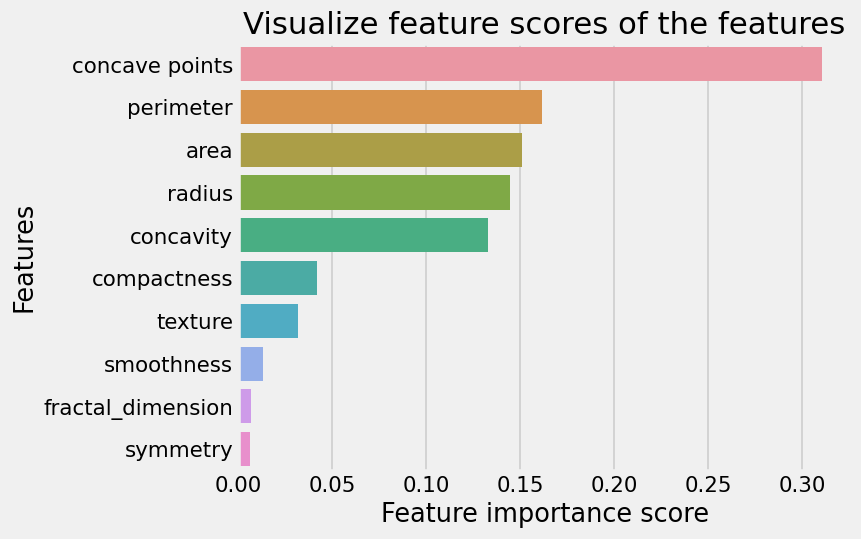

In [14]:
plot_feature_importance(feature_scores)

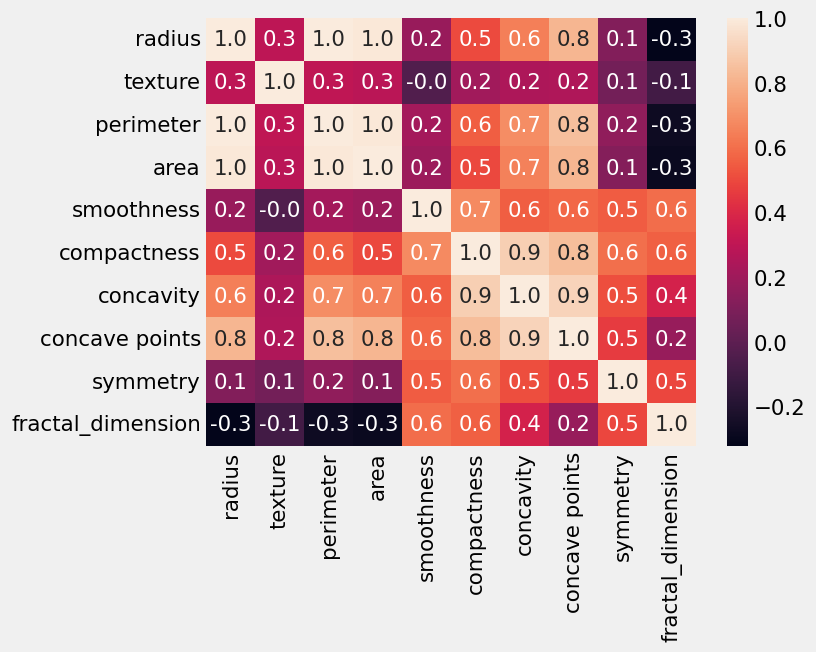

In [15]:
plot_correlation_matrix(X_train)

# Mean for every column

In [16]:
X_train.mean()

radius                14.126503
texture               19.438241
perimeter             91.904422
area                 655.325377
smoothness             0.095857
compactness            0.102648
concavity              0.088497
concave points         0.048535
symmetry               0.181364
fractal_dimension      0.062620
dtype: float64

In [33]:
# style = "fivethirtyeight"
# from matplotlib import pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(16, 12))
# def plot_multiple_distribution_grid(df, columns):
    # with plt.style.context(style):
        # for i, column in enumerate(columns, 1):
            # plt.subplot(3,3,i)
            # sns.histplot(df[column], kde=True)
        # plt.show()

<Figure size 1760x1320 with 0 Axes>

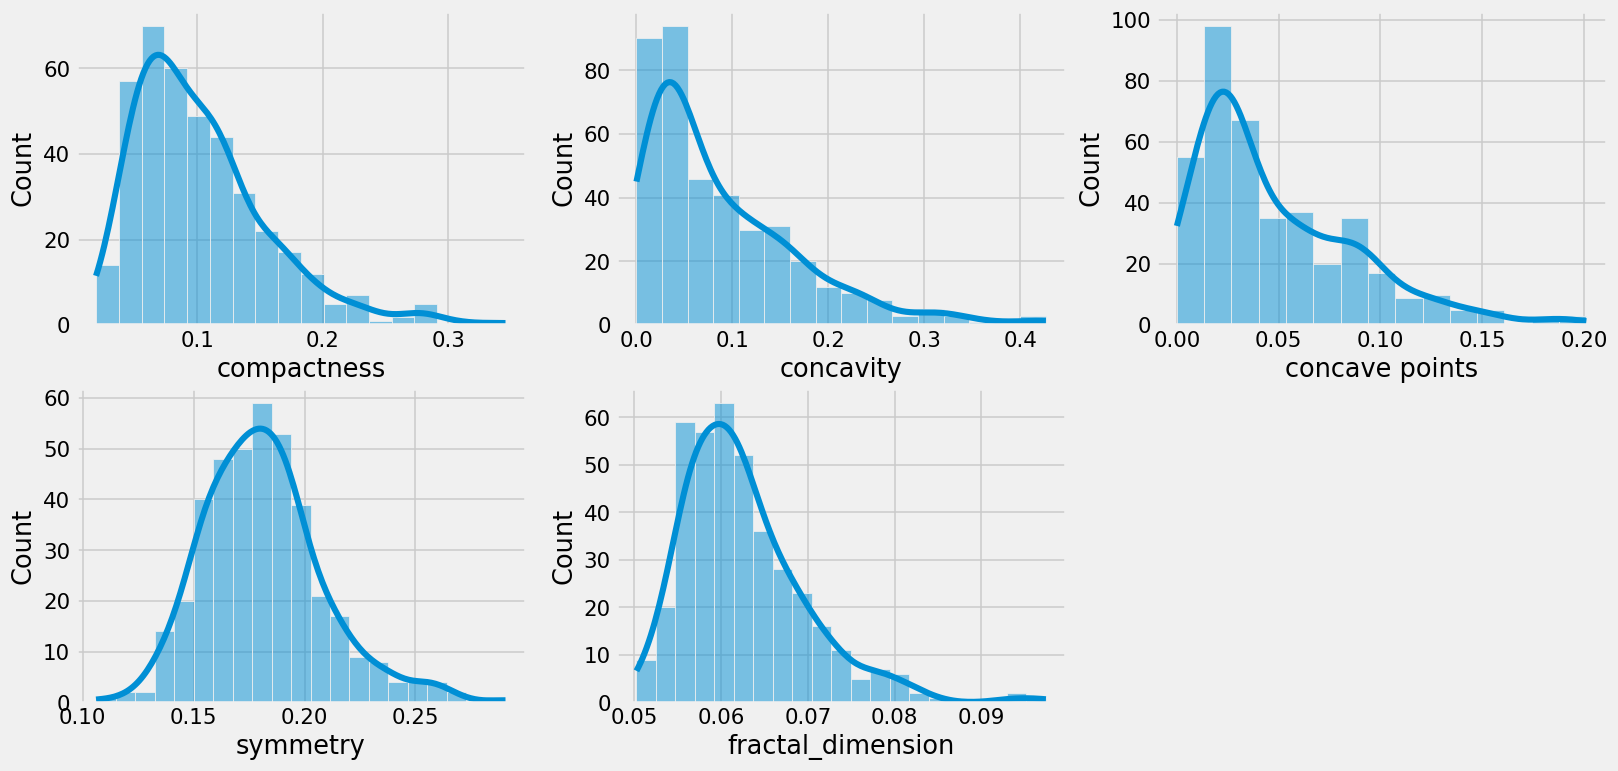

In [34]:
from src.visualization import plot_multiple_distribution_grid

plot_multiple_distribution_grid(X_train, X_train.columns[:5])
plot_multiple_distribution_grid(X_train, X_train.columns[5:])

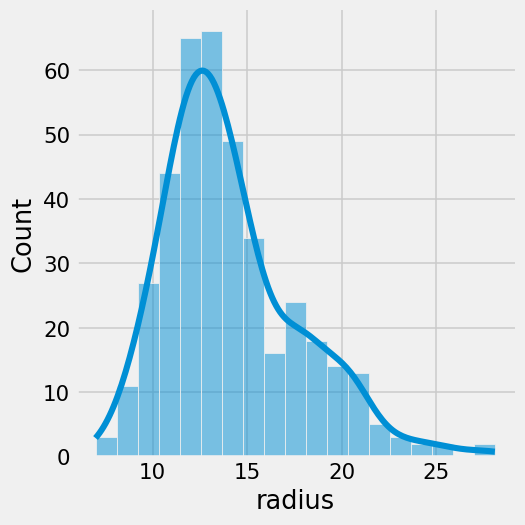

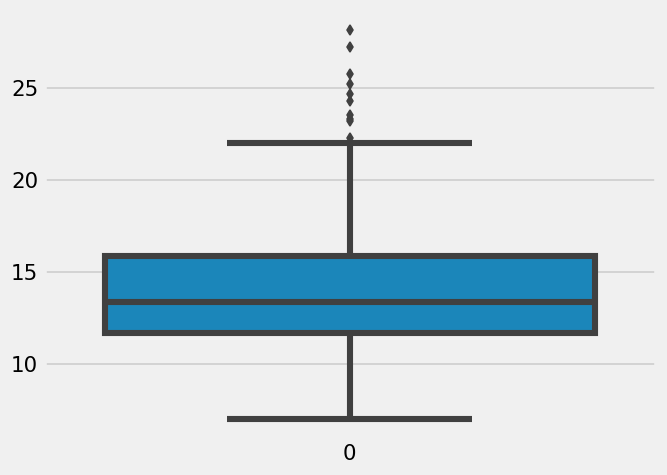

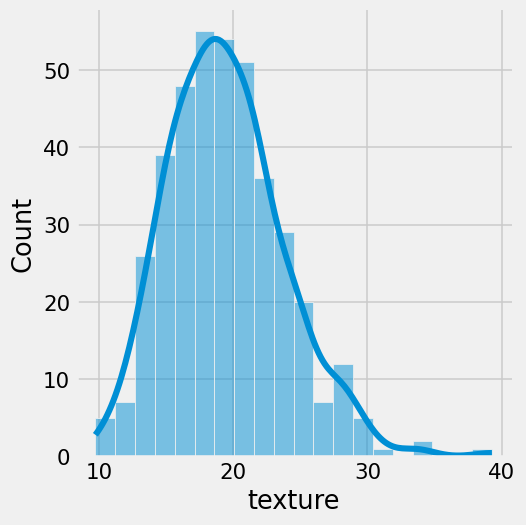

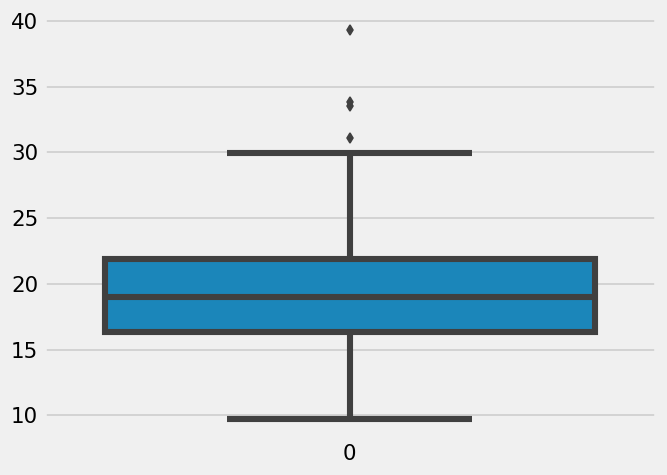

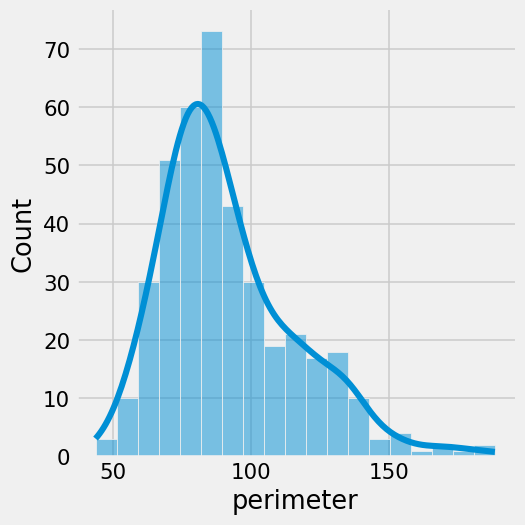

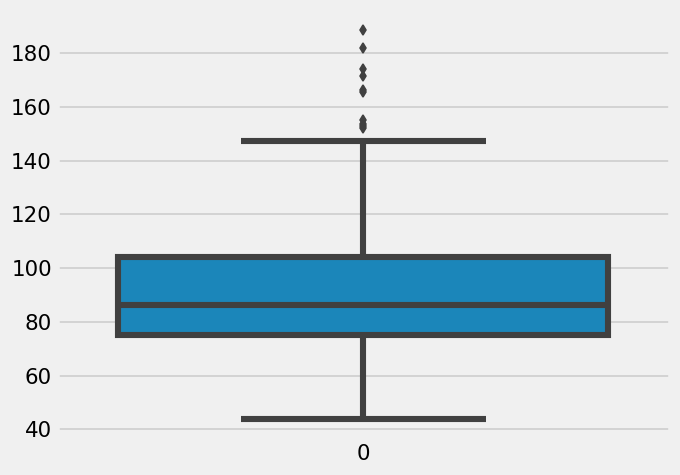

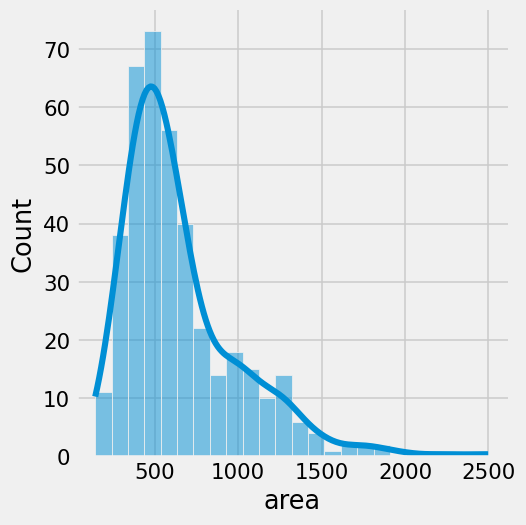

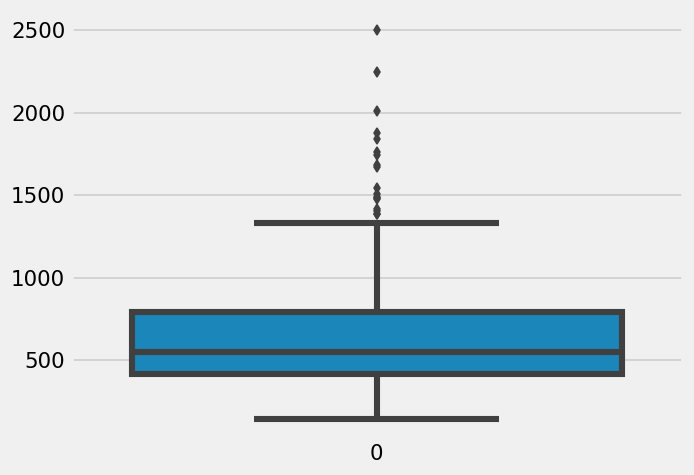

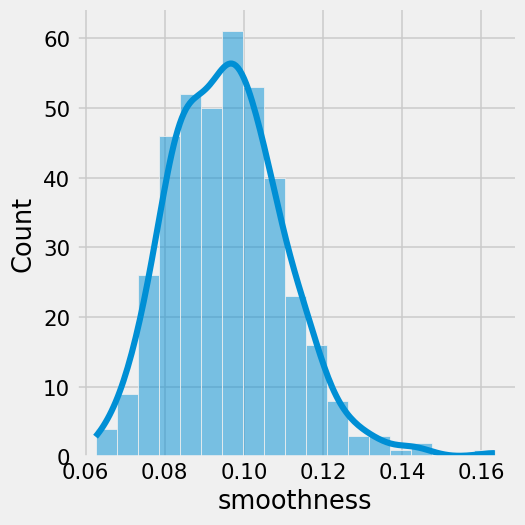

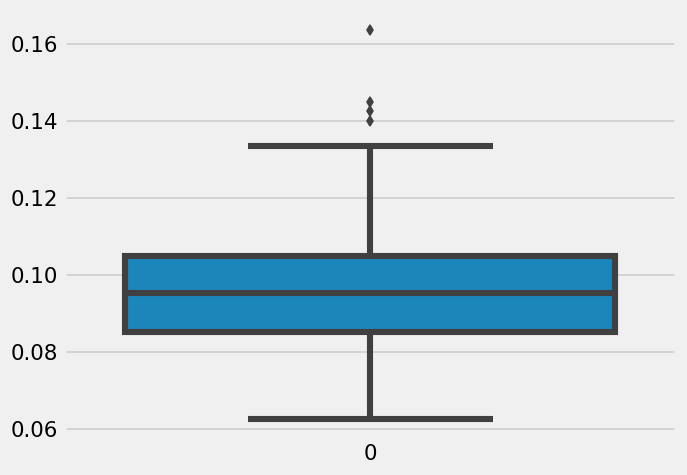

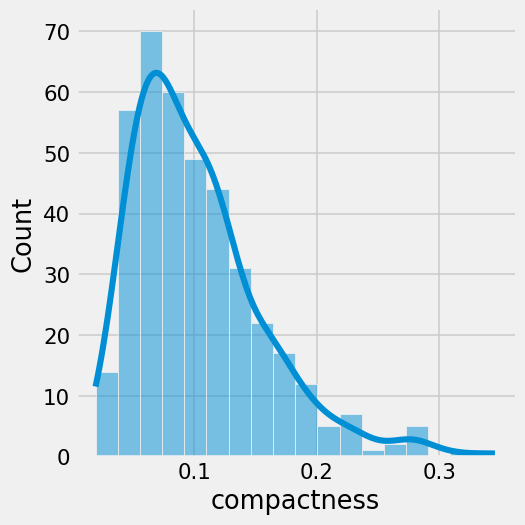

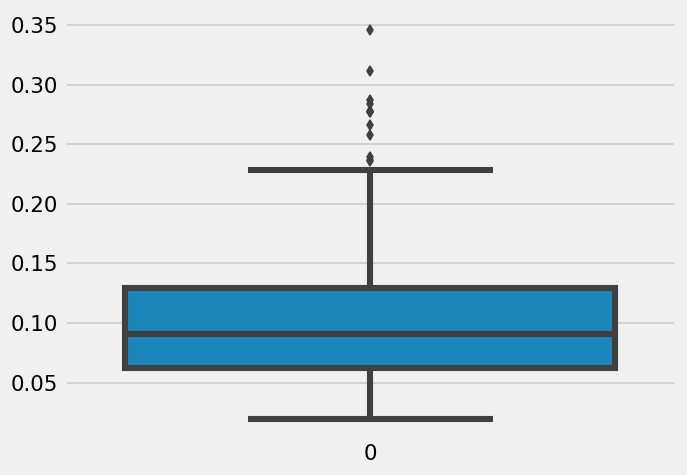

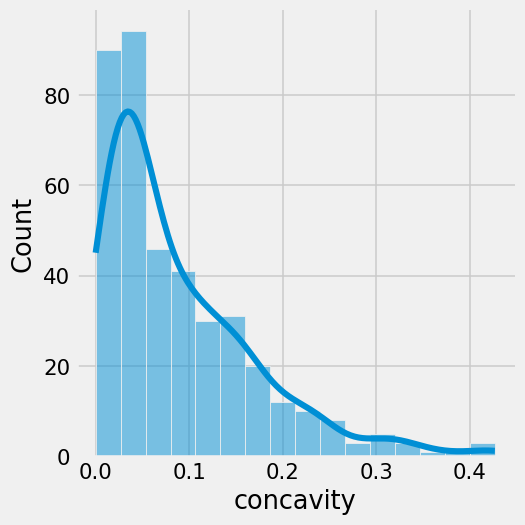

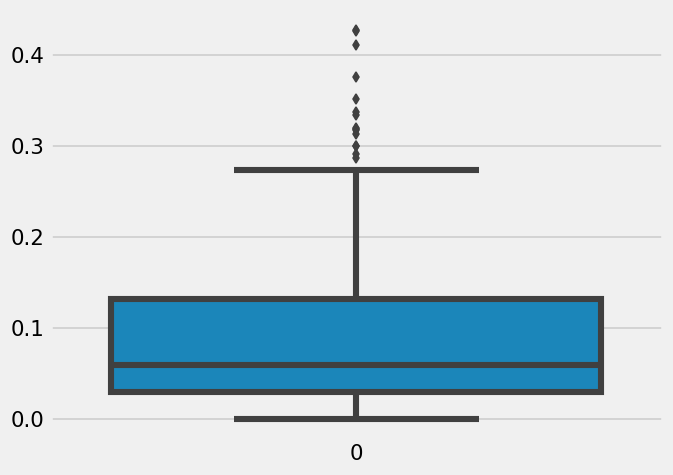

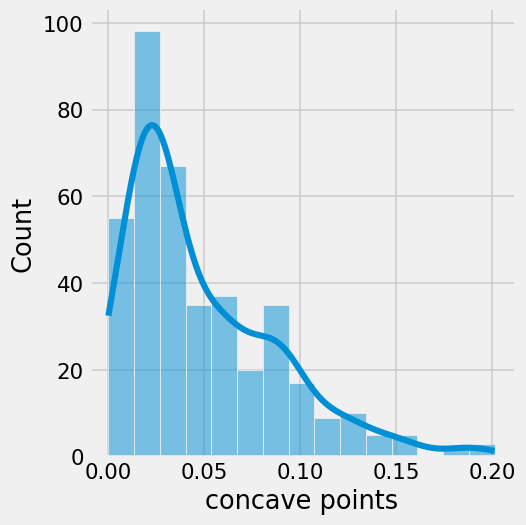

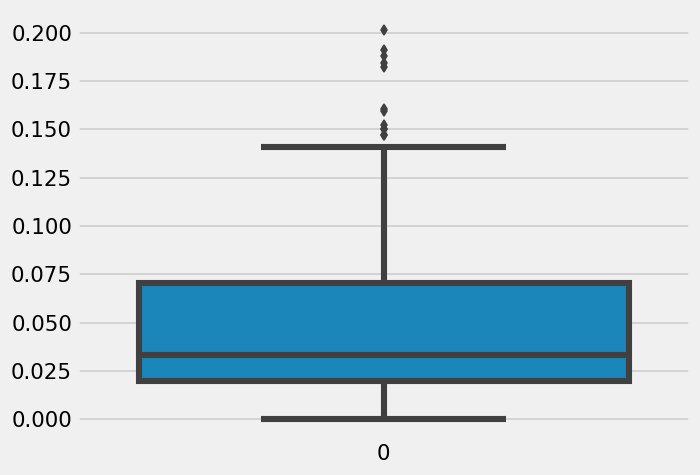

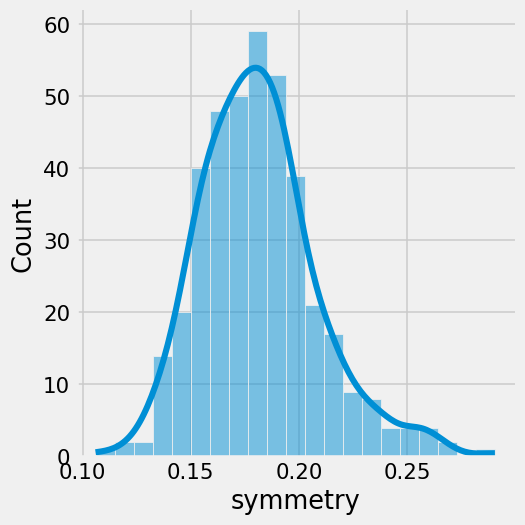

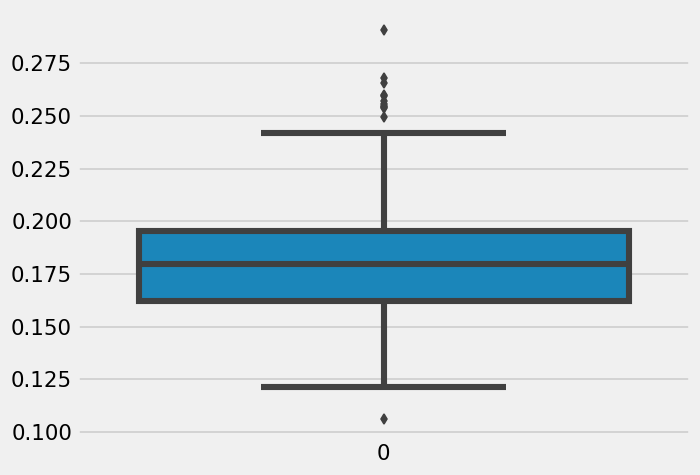

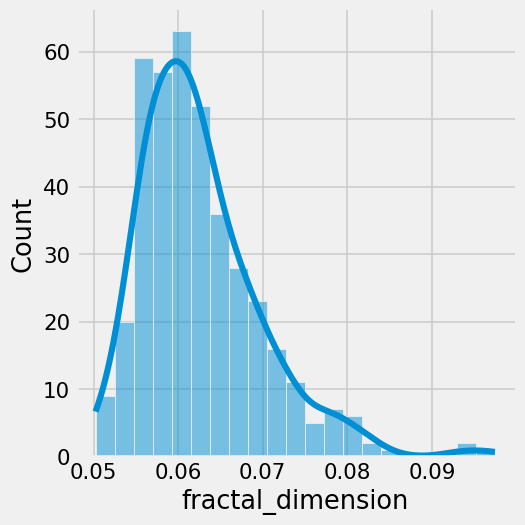

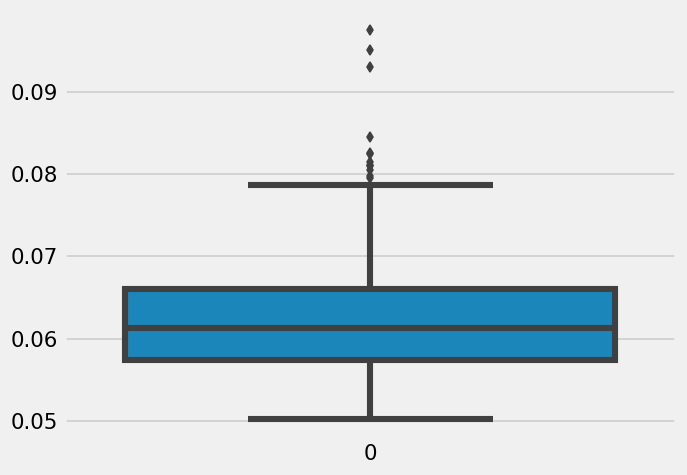

In [18]:
from src.visualization import plot_boxplot

for col in X_train:
    plot_distribution(X_train[col])
    plot_boxplot(X_train[col])